In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from sklearn.linear_model import LinearRegression

from get_data import GetData
import linear_regression as lr

start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 2, 1)
initial_data = GetData().get_data(start_date, end_date)
initial_data = GetData().transform_data(initial_data)
data = initial_data[0] 

window = 20
data['bz_ma'] = data['bz'].rolling(window=window).mean()
data['dst_ma'] = data['dst'].rolling(window=window).mean()
data['SYM_H_ma'] = data['dst'].rolling(window=window).mean()
data['ae_ma'] = data['ae'].rolling(window=window).mean()

bz = data.bz
data['index'] = range(len(bz))
data.set_index("index", inplace=True)
f107_values = initial_data[2].f107.resample('1h').ffill()

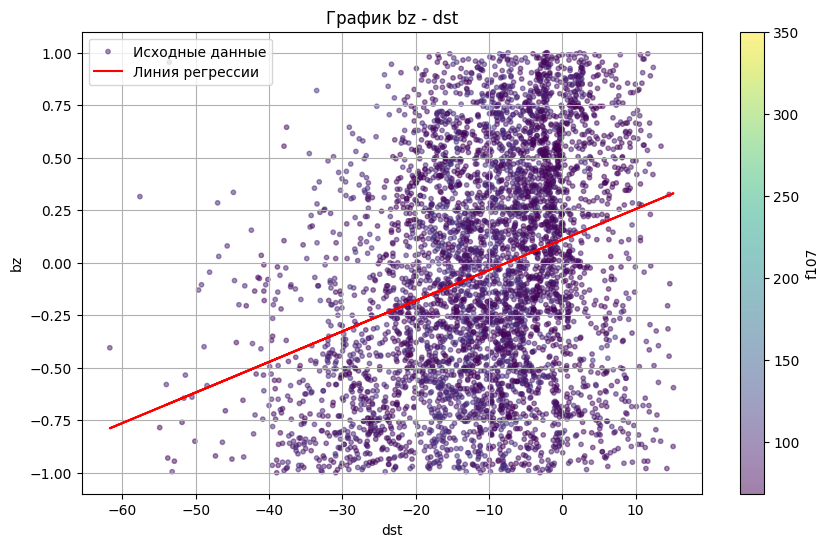

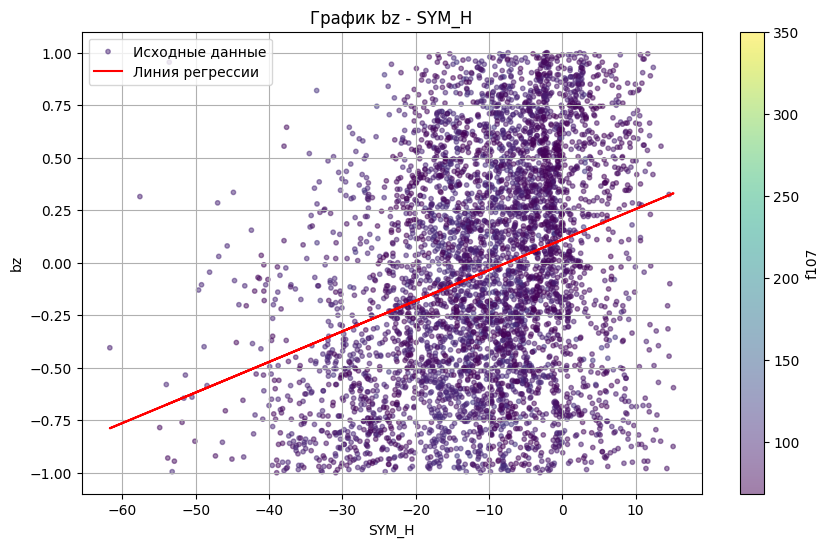

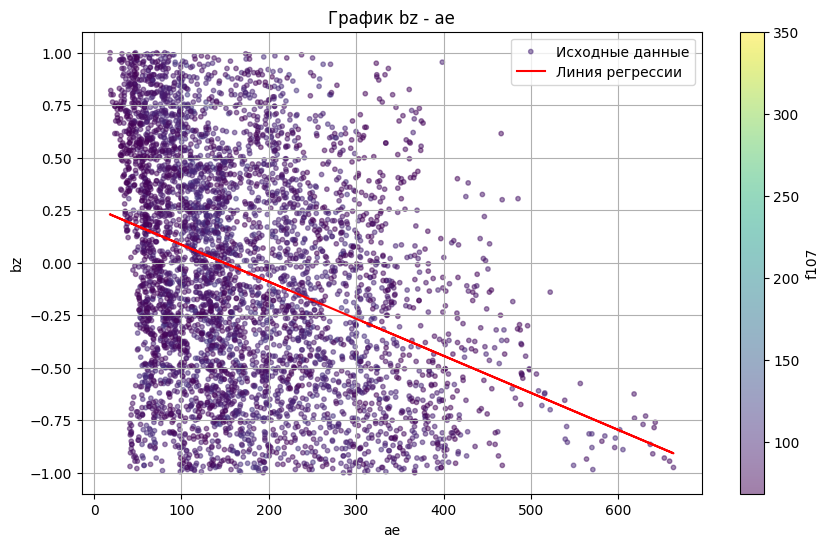

In [6]:
dst = initial_data[0].dst_ma
SYM_H = initial_data[0].SYM_H_ma
bz = initial_data[0].bz_ma
ae = initial_data[0].ae_ma

dst = dst.reset_index(drop=True)
SYM_H = SYM_H.reset_index(drop=True)
bz = bz.reset_index(drop=True)
ae = ae.reset_index(drop=True)
f107_values = f107_values.reset_index(drop=True)

mask = (bz <= 1) & (bz >= -1)
dst = dst[mask]
SYM_H = SYM_H[mask]
bz = bz[mask]
ae = ae[mask]
filtered_f107 = f107_values[mask]

plt.figure(figsize=(10, 6))
sc = plt.scatter(dst, bz, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
plt.plot(dst, lr.linear_regression(dst, bz), color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')

plt.grid(True)
plt.xlabel('dst')
plt.ylabel('bz')
plt.title('График bz - dst')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sc = plt.scatter(SYM_H, bz, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
plt.plot(SYM_H, lr.linear_regression(SYM_H, bz), color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')

plt.grid(True)
plt.xlabel('SYM_H')
plt.ylabel('bz')
plt.title('График bz - SYM_H')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sc = plt.scatter(ae, bz, c=filtered_f107, cmap='viridis', label='Исходные данные', s=10, vmax=350, alpha=0.5)
plt.plot(ae, lr.linear_regression(ae, bz), color='red', label='Линия регрессии')
plt.colorbar(sc, label='f107')

plt.grid(True)
plt.xlabel('ae')
plt.ylabel('bz')
plt.title('График bz - ae')
plt.legend()
plt.show()